In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [13]:
data = pd.read_csv(r"C:\Users\kosun\Downloads\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [14]:
data.shape

(34, 3)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [16]:
data.isnull()

,Newspaper,daily,sunday
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [17]:
data.sample(10)

,Newspaper,daily,sunday
6,Cincinnati Enquirer,198.832,348.744
17,New York Daily News,781.796,983.240
29,San Francisco Chronicle,570.364,704.322
30,St. Louis Post-Dispatch,391.286,585.681
7,Denver Post,252.624,417.779
14,Miami Herald,444.581,553.479
2,Boston Herald,355.628,235.084
26,Rochester Democrat & Chronicle,133.239,262.048
21,Orange County Register,354.843,407.760
9,Hartford Courant,231.177,323.084


correlation


In [19]:
data.drop('Newspaper',axis=1).corr()


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


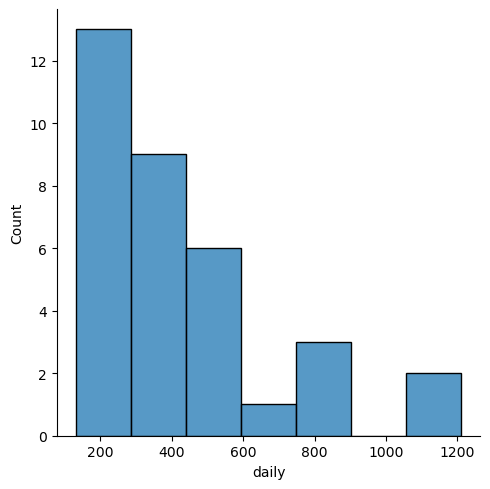

In [27]:
import seaborn as sns
sns.displot(data['daily'])

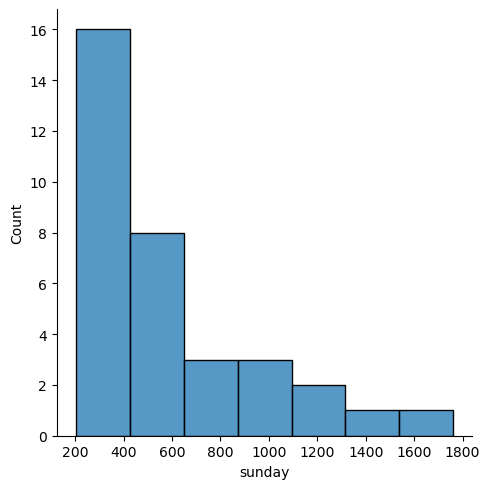

In [31]:
sns.displot(data['sunday'])

In [33]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit() 

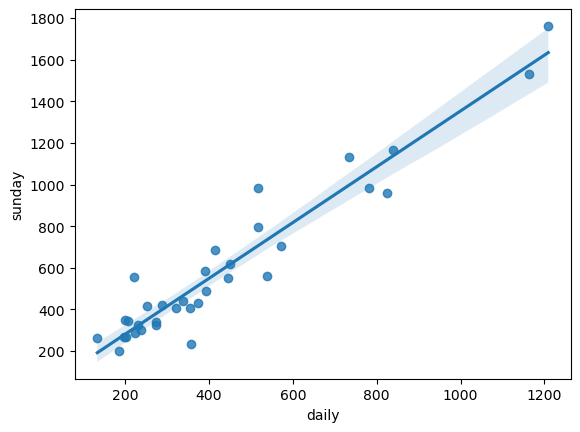

In [35]:
sns.regplot(x="daily",y="sunday",data=data);

In [37]:
#cofficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [39]:
print(model.tvalues, '\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [47]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

predict for new data point

In [63]:
#predict for 200 and 300 daily circulation
import pandas as pd

In [71]:
newdata = pd.Series([200,300])
print(newdata)

0    200
1    300
dtype: int64


In [73]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [75]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64